# What is Gradient Descent?
Gradient Descent is a first-order optimization technique used to find the local minimum or optimize the loss function. It is also known as the parameter optimization technique.

1. We have to find the best fit line that gives a minimum value of b when the loss is minimum. The loss function is defined as the squared sum of the difference between actual and predicted values.
2. To make the problem simple to understand Gradient descent suppose the value of m is given to us and we have to predict the value of intercept(b). so we want to find out the minimum value of b where L(loss) should be the minimum.

# Implementing Gradient Descent with 1 variable

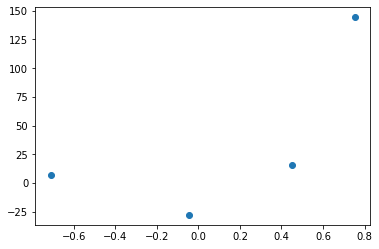

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)
plt.scatter(X,y)

### Get the value of m with OLS

In [2]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

[78.35063668]
26.15963284313262


In [4]:
print(reg.coef_)

[78.35063668]


In [5]:
print(reg.intercept_)

26.15963284313262


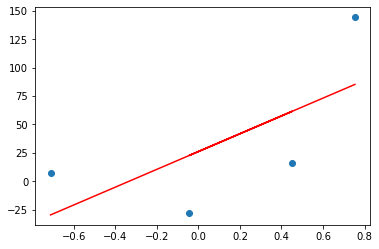

In [3]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

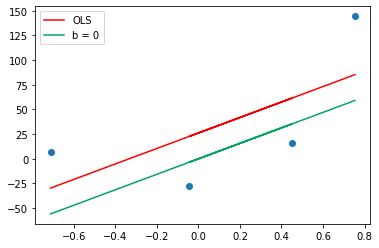

In [6]:
# First iteration
y_pred = ((78.35 * X) + 0).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [7]:
m = 78.35
b = 0
loss_slope = -2 * np.sum(y - m*X.ravel() - b) 
# Lets take learning rate = 0.1
lr = 0.1
step_size = loss_slope*lr
print(step_size)
# Calculating the new intercept
b = b - step_size
print(b)

-20.927763408209216
20.927763408209216


In [8]:
# Second iteration
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
step_size = loss_slope*lr
b = b - step_size
print(b)

25.11331608985106


Now the intercept is 25.1 which is very near to the required intercept. If you run one more iteration then I am sure you will get the required intercept and the green line will overtake the red one. 

## Gradient Descent for 2 Variables

### Step-1) Initialize the random value of m and b

here we initialize any random value like m is 1 and b is 0.

### Step-2) Initialize the number of epochs and learning rate

take learning rate small as possible suppose 0.01 and epochs as 100

### Step-3) Start calculating the slope and intercept in iterations 

Now we will apply a loop for several epochs and calculate slope and intercept.

In [9]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

In [10]:
class GDRegressor:
  def __init__(self, learning_rate, epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs
  def fit(self, X, y):
    #calculate b and m using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
      loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b)*X.ravel())
      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
    print(self.m, self.b)
  def predict(self, X):
    return self.m * X + self.b
#create object and check algorithm
gd = GDRegressor(0.001, 50)
gd.fit(X, y)

27.837060471820052 -2.2991839308293196


## Effect of Learning Rate
Learning rate is a very crucial parameter in Gradient Descent and should be selected wisely by experimenting two to three times. If you use learning rate as a very high value then you will never converge and the slope will dance from a positive to a negative axis. The learning rate is always set as a small value to converge fast.

### Effect of Loss Function
One is the learning rate whose effect we have seen and the next thing which affects the Gradient descent is loss function. we have used mean squared error through this article which is a very simple and most used loss function. This loss function is convex. A convex function is a function wherein between two points if you draw a line then the line never crosses the function which is known as convex function. Gradient descent is always a convex function because in convex there would be only one minima.

### Effect Of Data

Data affects the running time of Gradient Descent. If all the features in the data are at a common scale then it converges very fast and the contour plot is exactly circular. But If the feature scale is very different then the convergence time is too high And you will get a flatter contour